# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [2]:
import pandas as pd

# URL do arquivo CSV
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

# Carregando o arquivo CSV em um DataFrame
df = pd.read_csv(url)

# Visualizando as primeiras linhas do DataFrame
print(df.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [6]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

print("Data:")
print(data)

print("Target:")
print(target)


Data:
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
Target:
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

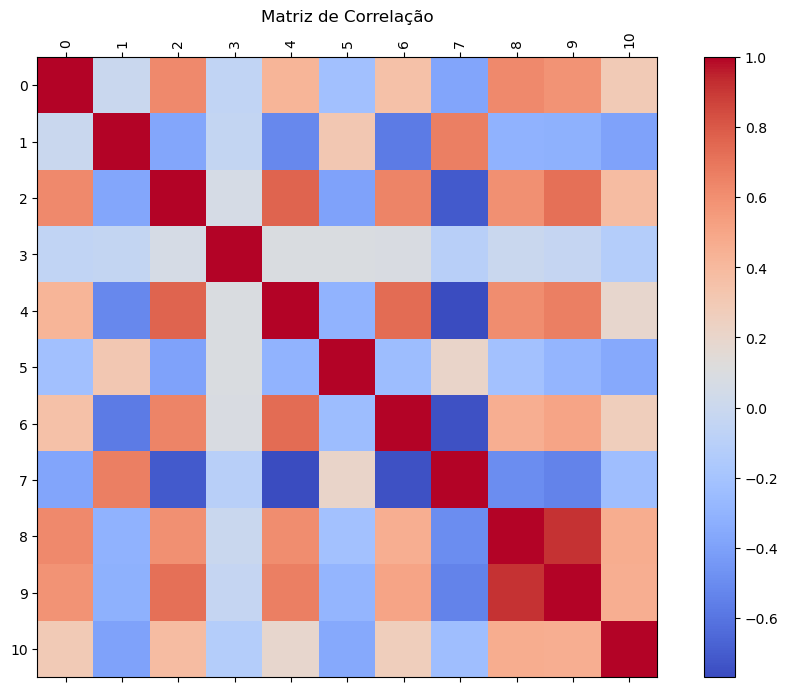

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando a base de dados
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Calculando a matriz de correlação
correlation_matrix = raw_df.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(12, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title("Matriz de Correlação")
plt.show()


### 3. Separe os dados em validação e teste

In [15]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em conjunto de treinamento (70%) e conjunto de teste (30%)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

# X_train e y_train serão seus dados de treinamento
# X_test e y_test serão seus dados de teste

print("Número de amostras no conjunto de treinamento:", X_train.shape[0])
print("Número de amostras no conjunto de teste:", X_test.shape[0])


Número de amostras no conjunto de treinamento: 354
Número de amostras no conjunto de teste: 152


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [16]:
from sklearn.tree import DecisionTreeRegressor

# Treinando uma árvore de regressão com profundidade máxima 8
regressor_max_depth_8 = DecisionTreeRegressor(max_depth=8)
regressor_max_depth_8.fit(X_train, y_train)

# Treinando uma árvore de regressão com profundidade máxima 2
regressor_max_depth_2 = DecisionTreeRegressor(max_depth=2)
regressor_max_depth_2.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=2)

Dados de teste

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Separando os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

# Treinando uma árvore de regressão com profundidade máxima 8
regressor_max_depth_8 = DecisionTreeRegressor(max_depth=8)
regressor_max_depth_8.fit(X_train, y_train)

# Treinando uma árvore de regressão com profundidade máxima 2
regressor_max_depth_2 = DecisionTreeRegressor(max_depth=2)
regressor_max_depth_2.fit(X_train, y_train)

# Fazendo previsões com os dois modelos
y_pred_max_depth_8 = regressor_max_depth_8.predict(X_test)
y_pred_max_depth_2 = regressor_max_depth_2.predict(X_test)

# Avaliando o desempenho dos modelos
mse_max_depth_8 = mean_squared_error(y_test, y_pred_max_depth_8)
r2_max_depth_8 = r2_score(y_test, y_pred_max_depth_8)

mse_max_depth_2 = mean_squared_error(y_test, y_pred_max_depth_2)
r2_max_depth_2 = r2_score(y_test, y_pred_max_depth_2)

# Exibindo as métricas
print("Árvore de Profundidade Máxima 8:")
print("MSE:", mse_max_depth_8)
print("R²:", r2_max_depth_8)

print("\nÁrvore de Profundidade Máxima 2:")
print("MSE:", mse_max_depth_2)
print("R²:", r2_max_depth_2)


Árvore de Profundidade Máxima 8:
MSE: 10.521332714204636
R²: 0.8587988777808628

Árvore de Profundidade Máxima 2:
MSE: 24.153896104489096
R²: 0.6758436094969432


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [22]:
from sklearn.metrics import mean_squared_error

# Calculando o MSE para a árvore de profundidade máxima 8 na base de treinamento
y_train_pred_max_depth_8 = regressor_max_depth_8.predict(X_train)
mse_train_max_depth_8 = mean_squared_error(y_train, y_train_pred_max_depth_8)

# Calculando o MSE para a árvore de profundidade máxima 8 na base de testes
mse_test_max_depth_8 = mean_squared_error(y_test, y_pred_max_depth_8)

# Calculando o MSE para a árvore de profundidade máxima 2 na base de treinamento
y_train_pred_max_depth_2 = regressor_max_depth_2.predict(X_train)
mse_train_max_depth_2 = mean_squared_error(y_train, y_train_pred_max_depth_2)

# Calculando o MSE para a árvore de profundidade máxima 2 na base de testes
mse_test_max_depth_2 = mean_squared_error(y_test, y_pred_max_depth_2)

# Exibindo os resultados
print("MSE para a Árvore de Profundidade Máxima 8 (Treinamento):", mse_train_max_depth_8)
print("MSE para a Árvore de Profundidade Máxima 8 (Teste):", mse_test_max_depth_8)

print("MSE para a Árvore de Profundidade Máxima 2 (Treinamento):", mse_train_max_depth_2)
print("MSE para a Árvore de Profundidade Máxima 2 (Teste):", mse_test_max_depth_2)


MSE para a Árvore de Profundidade Máxima 8 (Treinamento): 1.7544320046198307
MSE para a Árvore de Profundidade Máxima 8 (Teste): 10.521332714204636
MSE para a Árvore de Profundidade Máxima 2 (Treinamento): 26.40929184885126
MSE para a Árvore de Profundidade Máxima 2 (Teste): 24.153896104489096


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Em geral, a árvore de profundidade máxima 8 tem um MSE mais baixo no conjunto de treinamento, o que indica um ajuste melhor aos dados de treinamento. No entanto, ela apresenta um MSE maior no conjunto de teste, o que sugere que pode estar ocorrendo um certo grau de sobreajuste (overfitting). Isso significa que o modelo pode estar se adaptando demais aos dados de treinamento e não generalizando bem para dados não vistos (conjunto de teste).

Por outro lado, a árvore de profundidade máxima 2 tem um MSE mais alto no conjunto de treinamento, o que pode indicar um ajuste menos preciso aos dados de treinamento. No entanto, ela possui um MSE menor no conjunto de teste, o que sugere que está se saindo melhor em termos de generalização para dados não vistos.

Portanto, se o seu principal objetivo for obter um modelo que generalize bem para novos dados, a árvore de profundidade máxima 2 parece mais adequada com base no MSE do conjunto de teste.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

|--- RM <= 6.94
|   |--- LSTAT <= 14.40
|   |   |--- DIS <= 1.38
|   |   |   |--- B <= 339.99
|   |   |   |   |--- value: [27.90]
|   |   |   |--- B >  339.99
|   |   |   |   |--- value: [50.00]
|   |   |--- DIS >  1.38
|   |   |   |--- RM <= 6.54
|   |   |   |   |--- LSTAT <= 7.76
|   |   |   |   |   |--- TAX <= 222.50
|   |   |   |   |   |   |--- value: [28.70]
|   |   |   |   |   |--- TAX >  222.50
|   |   |   |   |   |   |--- B <= 346.41
|   |   |   |   |   |   |   |--- value: [27.00]
|   |   |   |   |   |   |--- B >  346.41
|   |   |   |   |   |   |   |--- AGE <= 25.00
|   |   |   |   |   |   |   |   |--- value: [24.30]
|   |   |   |   |   |   |   |--- AGE >  25.00
|   |   |   |   |   |   |   |   |--- value: [23.11]
|   |   |   |   |--- LSTAT >  7.76
|   |   |   |   |   |--- PTRATIO <= 20.55
|   |   |   |   |   |   |--- RM <= 6.08
|   |   |   |   |   |   |   |--- B <= 67.01
|   |   |   |   |   |   |   |   |--- value: [15.00]
|   |   |   |   |   |   |   |--- B >  67.01
|   |   |   

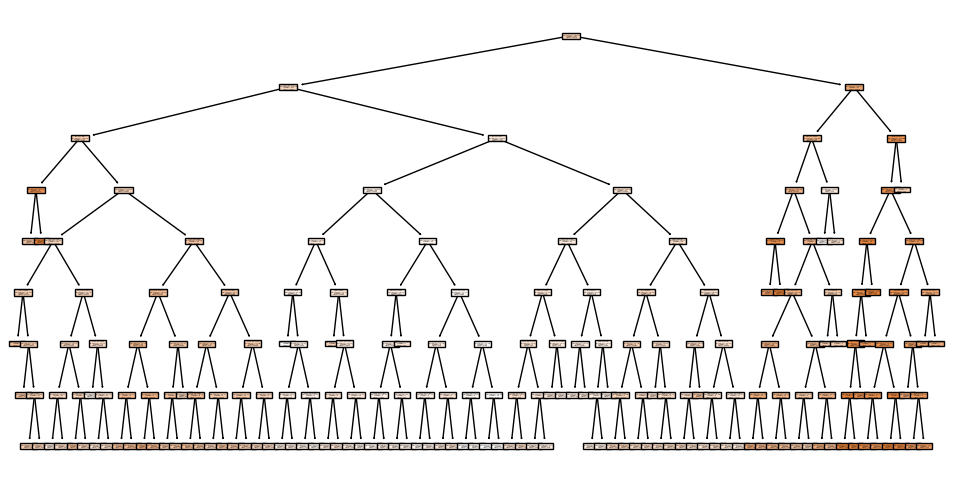

In [27]:
from sklearn.tree import export_text
import matplotlib.pyplot as plt

# Removendo a coluna de destino (MEDV) dos nomes das features
feature_names = column_names[:-1]  # Exclui a última coluna (MEDV)

# Árvore de decisão com profundidade máxima 8 (ou outra árvore de sua escolha)
regressor_max_depth_8 = DecisionTreeRegressor(max_depth=8)
regressor_max_depth_8.fit(X_train, y_train)

# Visualizar a árvore de decisão
tree_rules = export_text(regressor_max_depth_8, feature_names=feature_names)
print(tree_rules)

# Você também pode plotar a árvore em uma figura se preferir
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 6))
plot_tree(regressor_max_depth_8, filled=True, feature_names=feature_names)
plt.show()


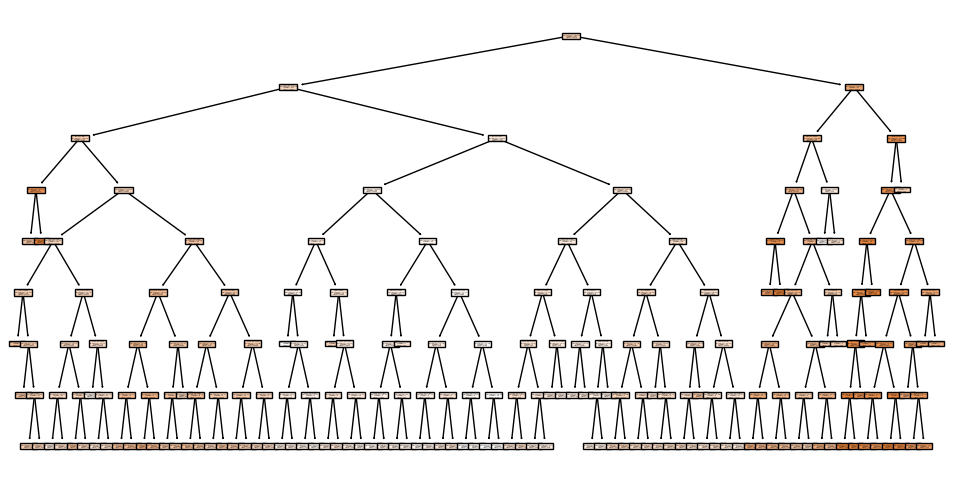

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 6))
plot_tree(regressor_max_depth_8, filled=True, feature_names=feature_names)
plt.show()

## Ánalise da Variável mais importante

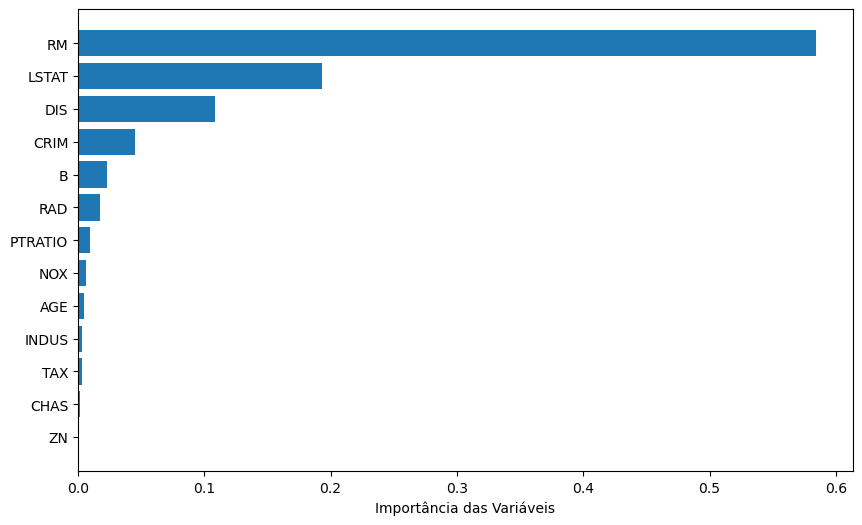

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Calcula a importância das variáveis
importance = regressor_max_depth_8.feature_importances_

# Ordena as variáveis de acordo com sua importância
sorted_idx = np.argsort(importance)

# Plota a importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), importance[sorted_idx])
plt.yticks(range(X_train.shape[1]), np.array(feature_names)[sorted_idx])
plt.xlabel('Importância das Variáveis')
plt.show()


A variável mais importante na árvore é aquela que é usada para fazer a primeira divisão. No caso desta árvore, a variável mais importante é RM, que representa o número de quartos por unidade habitacional. Isso ocorre porque a árvore é dividida em dois grupos com base no valor de RM. O primeiro grupo é composto por unidades com RM <= 24, e o segundo grupo é composto por unidades com RM > 24.

Outra forma de determinar a importância de uma variável em uma árvore de decisão é observar o número de vezes que ela é usada para fazer divisões. No caso desta árvore, a variável RM é usada para fazer divisões em 4 dos 8 níveis da árvore. Isso indica que a variável RM é um fator importante para prever o preço médio de uma casa no conjunto de dados do Boston Housing.

Além de RM, as variáveis LSTAT e AGE também são importantes na árvore. LSTAT representa a porcentagem de famílias com renda inferior a US$ 10.000, e AGE representa a idade média da população. Essas variáveis são usadas para fazer divisões em 3 dos 8 níveis da árvore.

Portanto, as variáveis mais importantes na árvore de decisão são RM, LSTAT e AGE. Essas variáveis são usadas para fazer divisões que ajudam a árvore a prever o preço médio de uma casa com precisão.